In this problem, you will perform the value iteration updates manually on a very basic game just to solidify your
intuitions about solving MDPs. The set of possible states in this game is $\mathcal{S} = \{−2, −1, 0, +1, +2\}$ and the set of
possible actions is $A = \{a1 , a2\}$ . The initial state is 0 and there are two terminal states, −2 and +2. 

Recall that the transition function $ T : S \times A \to \Delta (S)$ encodes the probability of 
transitioning to a next state $s^′$ after being in state $s$ and taking action $a$ as $T (s^{′} |s, a)$. 

In this MDP, the transition dynamics are given as follows:  

$∀i ∈ {−1, 0, 1} ⊂ S$   
$ T (i − 1|i, a1 ) = 0.8 $ and $T (i + 1|i, a1 ) = 0.2$  
$ T (i − 1|i, a2 ) = 0.7 $ and $T (i + 1|i, a2 ) = 0.3$  


Think of this MDP as a chain formed by states {−2, −1, 0, +1, +2}. In words, action $a1$ has a 80% chance of
moving the agent backwards in the chain and a 20% chance of moving the agent forward. Similarly, action a2 has a
70% of sending the agent backwards and a 30% chance of moving the agent forward. We will use a discount factor
$ \gamma = 1$.  

The reward function for this MDP is 
$$ \Bbb{R}(s, a, s{'}) =  \begin{cases} 
                            10 & s^{'} = -2 \\ 
                            50 & s^{'} = +2 \\ 
                            -5 & \text{otherwise}
                         \end{cases} $$

What are we asking ?


----------------
## A, Value iteration
What is the value of $V_{i}^{*}(s)$ for each state in $\mathcal{S}$ after each iteration $i = \{0, 1, 2\}$ of
Value Iteration? 

Please write down the values from all iterations. Recall that $∀s ∈ \mathcal{S}$,
$V_{0}^{*}(s) = 0$ and, for any terminal state $s_{terminal}$, $V^{*}(s_{terminal}) = 0$ . In other words, all values
are 0 after iteration 0 and terminate states always have a value of 0.
  
*What we expect*: The $V_{i}^{*}(s)$ of all 5 states after each iteration. In total, 15 values should be
reported.

-----------------
## B Policy Derivation
Using $V_2^* (⋅)$, what is the corresponding optimal policy $\pi^*$ for all non-terminal states?  
*What we expect*: A few state action pairs to express the optimal policy.

We can do it manually, in excell, or by hand...  
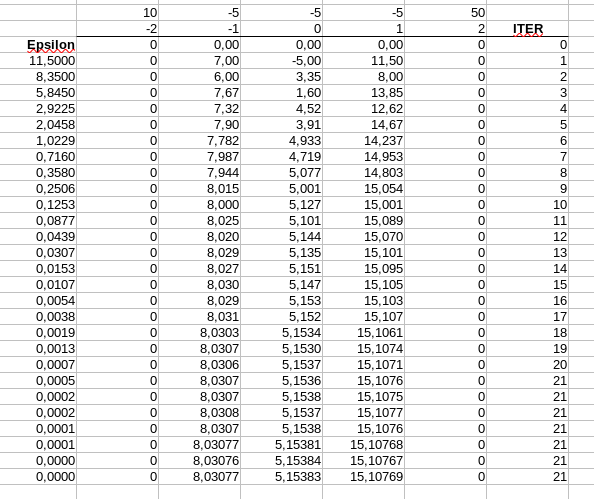

## Or we can implement it using the MDP Simple framework....

In [17]:
# inherit from the Mdp class
from mdp import Mdp


# overload the key methods required
class simpleMdp(Mdp):

    def allStates(self):
        return [-2,-1,0,1,2]
        
    def allActions(self):
        return [1,2]

    def actionsForState(self, state):
        """ return a list of actions permissible for the given state"""
        if state in [-2,2]:
            return []
        else:
            return self.allActions()
    
    def isTerminalState(self,state):
        return state in [-2,2]
    
    
    def reward(self, initState,action, endState):
        """ returns the reward of the combination """
        if endState == -2:
            return 10
        elif endState == 2:
            return 50
        else:
            return -5

    def transitionProbs(self, initState, action):
        """ returns a colection of (endState,Prob) resulting from applying the given action to the initState """
        if initState in [-2,2]: return []
        if action == 1:
            return [(initState-1,0.8),(initState+1,0.2)]
        if action == 2:
            return [(initState-1,0.7),(initState+1,0.3)]

## Now execute the Value iteration alg and the ValueFromPolicy...

In [21]:

s = simpleMdp()

# call the value iteration, with the trace option to show how the values evolve in successive iterations
value = s.value_iteration(1.0,0.0001,True,True)
print (f"The resulting value is : \n {value}")
print (f"Print the resulting Policy is: {s.policyFromValue(value[0], 1)}")


{-2: 0, -1: 7.0, 0: -5.0, 1: 11.5, 2: 0} 11.5
{-2: 0, -1: 6.0, 0: 3.3499999999999996, 1: 8.0, 2: 0} 8.35
{-2: 0, -1: 7.67, 0: 1.5999999999999999, 1: 13.844999999999999, 2: 0} 5.844999999999999
{-2: 0, -1: 7.32, 0: 4.522499999999999, 1: 12.620000000000001, 2: 0} 2.9224999999999994
{-2: 0, -1: 7.9045, 0: 3.91, 1: 14.66575, 2: 0} 2.045749999999998
{-2: 0, -1: 7.782, 0: 4.932874999999999, 1: 14.237, 2: 0} 1.022874999999999
{-2: 0, -1: 7.986575, 0: 4.7185, 1: 14.9530125, 2: 0} 0.7160124999999997
{-2: 0, -1: 7.9437, 0: 5.0765062499999996, 1: 14.80295, 2: 0} 0.35800624999999986
{-2: 0, -1: 8.01530125, 0: 5.001474999999999, 1: 15.053554375, 2: 0} 0.250604375
{-2: 0, -1: 8.000295, 0: 5.1267771875, 1: 15.001032499999999, 2: 0} 0.12530218750000088
{-2: 0, -1: 8.0253554375, 0: 5.100516249999999, 1: 15.08874403125, 2: 0} 0.08771153125000097
{-2: 0, -1: 8.02010325, 0: 5.144372015625, 1: 15.070361375, 2: 0} 0.04385576562500049
{-2: 0, -1: 8.028874403125, 0: 5.1351806875, 1: 15.1010604109375, 2: 0} 0.